In [141]:
import pandas as pd
pd.set_option('max_colwidth',1000)

Cargamos la base de datos de TASS, con tweets catálogados que nos permitirá hacer el entrenamiento de algoritmos de machine learning, estos tienen una polaridad asignada para cada tweet.

In [142]:
general_tweets_corpus_train = pd.read_csv('general-tweets-train-tagged.csv', encoding='utf-8')
social_tweets_corpus_train = pd.read_csv('socialtv-tweets-train-tagged.csv', encoding='utf-8')
stompol_tweets_train_tagged = pd.read_csv('stompol-tweets-train-tagged.csv', encoding='utf-8')
#tweet_testeo = pd.read_csv('tweet_test.csv', encoding='utf-8')

In [143]:
general_tweets_corpus_train.head()

,content,polarity,agreement
0,"Salgo de #VeoTV , que día más largoooooo...",NONE,AGREEMENT
1,@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias,NEU,DISAGREEMENT
2,@marodriguezb Gracias MAR,P,AGREEMENT
3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N+,AGREEMENT
4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P+,AGREEMENT


In [144]:
social_tweets_corpus_train.head()

,content,polarity,agreement
0,Los que esta noche van a la redonda a celebrar la victoria del Real Madrid les espero para cuando suba el @realmurciacfsad a primera.,P,
1,Diooooos que careron de gareth madreeeeee ahí están los jugadores importantes decidiendo partidos vamos coñoooooooo jajaja hala madrid,P,
2,Ganó el mejor. @realmadrid #CopaRelRey #FinalCopaRelRey,P,
3,@realmadrid Felicidades!!! ? Gracias por alegrarme la tarde!!! ??? *Aplausos* #Feliz,P,
4,@titelas Mañana Bale en naranja,NEU,


In [145]:
stompol_tweets_train_tagged.head()

,content,polarity,agreement
0,Diga cuanto nos van a costar las autovías de sus amiguetes ¿4500 millones o más ? @EsperanzAguirre @PPopular,N,
1,@lhermoso_ @sanchezcastejon #DobleMoral Castilla antes que Aragón...,N,
2,@PSOE @sanchezcastejon Me hace mucha gracia que esa afirmación la haga el PSOE,N,
3,Para que todo el mundo lo tengo claro .... @CsAlzira_ https://t.co/kcDxbhu3Ha,NEU,
4,@Albert_Rivera y @CiudadanosCs saben q este país es progresista pero q se arruga y vota centro. Discurso moderado y electoralista.,N,


Concatenamos los Tweets cargados anteriormente en un solo Corpus

In [146]:
tweets_corpus = pd.concat([
        general_tweets_corpus_train,
        social_tweets_corpus_train,
        stompol_tweets_train_tagged,
        #tweet_testeo,
    ])
tweets_corpus.sample(20)

,content,polarity,agreement
300,Ey que los del Barça se quedan mirando. Ya tienen algo de que presumir,N,
6989,Consolación y lagrimas. Es preciosa . #malagasanta #cofradiasmlg #malaga http://t.co/9RLa749u,P+,AGREEMENT
2213,"Estupendo, si estoy hablamos “@JoseNicolas13: Notición! Nos avisa nuestro profesor de que ha concertado una visita a EM el 27 de Enero.",P+,AGREEMENT
1595,"Pues nada, una época dorada llega a su fin!!! Enhorabuena a los madridistas que están todo el año, no a los que salen sólo hoy.",P,
6230,La gente está sobrecogidahttp://t.co/cGVyaibU,N,AGREEMENT
667,@MafeSaavedrap naaaaaa muy de buenas. Como se Salvan al minuto 89 De Neymar :D,NEU,
1204,"Esta noche, a partir de las doce, nos vemos en @13television @DHAM_13tv con @alfonsomerlos y el análisis del nuevo gobierno d @marianorajoy",NONE,AGREEMENT
639,RT @delahozm: @sevillajordi @anarcanil @susannagriso Allí estaremos en un par de horas,NONE,AGREEMENT
642,Explosiona un pequeño artefacto junto al Estadio Olímpico de La Cartuja / Estaba oculto en una jardinera http://t.co/wryiOZO4,N+,AGREEMENT
5383,Nuestra portada: emprendedores de Youtube “@quediario QUÉ! del jueves 8 de marzo de 2012 http://t.co/LCAjKPor”,NONE,AGREEMENT


Filtramos tweets en desacuerdo y sin polaridad y removemos los tweets que son solo hipervinculos

In [147]:
tweets_corpus = tweets_corpus.query('agreement != "DISAGREEMENT" and polarity != "NONE"')
tweets_corpus = tweets_corpus[-tweets_corpus.content.str.contains('^http.*$')]

In [148]:
tweets_corpus.size  #tamaño vector entrenamiento

22650

In [149]:
tweets_corpus.sample(10)

,content,polarity,agreement
43,"@cmgorriaran @DANIEL_FM_TUIT @UPyD lo dicho, no me parece que ayude a quitar la imagen de que UPyD desaparece ...",N,
2478,Desprecio a las leyes..El TSJA anula la integración del personal de Egmasa en la agencia del enchufismo http://t.co/c3X2Sq0w via @elmundoes,N,AGREEMENT
1241,"El césped de Mestalla estaba molt alt Xavi Hernández , jugador del Barça , acaba de perder la Copa del Rey .",N,
1697,"""A Todos Los BArcelonistas aki esta la copa del Rey Primero Dios la liga y la Champions HdP . Hala Madrid <3 http://t.co/CBhjszmolr""",N,
5158,Buenos días a todos!,P,AGREEMENT
1076,"Para todos vosotros, pa que lo disfruteis! Un beso!! #HalaMadrid http://t.co/ocWyO8ALOd",P,
3192,"No me gusta el artículo de @el_pais contra Carme Chacón. Dar patadas a Barroso en el trasero de Chacón es venganza, no información. #feofeo",N+,AGREEMENT
59,Me gustaría saber si @CiudadanosCs se ha planteado la eliminación completa d la Ley del menor. Si se comete crimen d adulto se paga como tal,NEU,
2615,"No tenemos nada que ocultar, si apoyan una comisión de investigación sobre la crisis y sus responsables seremos los primeros. Un paripé no.",P,AGREEMENT
3870,"“@RosEnrique: @PaulaVazquezTV leer?????? Esta sobrevalorado, besos desde Malaga” eso es que lo has practicado poco!",NEU,AGREEMENT


Seguiremos con el proceso de Tokenizar y stemming

Primero descargaremos las stopwords

In [150]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jromanf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Luego cargaremos las stopwords en español

In [151]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

In [152]:
from string import punctuation
non_words = list(punctuation)
#we add spanish punctuation
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

Creamos a continuación las funciones para token y stemm

In [153]:
#Funcion token, stem
from sklearn.feature_extraction.text import CountVectorizer       
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


stemmer = SnowballStemmer('spanish')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = ''.join([c for c in text if c not in non_words])
    # tokenize
    tokens =  word_tokenize(text)

    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


Vamos a evaluar el modelo con los tweets que tienen una polaridad diferente a la neutral

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

tweets_corpus = tweets_corpus[tweets_corpus.polarity != 'NEU']

tweets_corpus['polarity_bin'] = 0
tweets_corpus.polarity_bin[tweets_corpus.polarity.isin(['P', 'P+'])] = 1
tweets_corpus.polarity_bin.value_counts(normalize=True)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    0.548709
0    0.451291
Name: polarity_bin, dtype: float64

In [155]:
tweets_corpus.sample(8)

,content,polarity,agreement,polarity_bin
5868,"""La herencia del @PSOE : trabajos a ratos y 5 euros la hora"" Editorial @13tv_AlDia @13television 20.30h . ¡Gracias Zapatero!",N,AGREEMENT,0
7209,Rick Santorum se retira de la campaña en las primarias republicanas http://t.co/Kgc23FMX via @el_pais,N,AGREEMENT,0
3572,"El ejemplo del IRPF es simplificado irreal, demagogia. Mal rollo.",N+,AGREEMENT,0
5199,RT: “@doctorchuslolo: seria Ras-Putin al que no consiguieron matar y consiguio el secreto de la eterna juventud. Jordi Hurtado sovietico”,P+,AGREEMENT,1
4370,"En la #C_A_2012 ""La reforma laboral propone despedir barato a los mayores para contratar en precario a los jóvenes""",N+,AGREEMENT,0
4839,Saldremos d una crisis provocada x una desregulación financiera mediante una desregulación laboral?,N+,AGREEMENT,0
5454,"Libertad religiosa y libertad educativa, pdtes de Estrasburgo. hablamos con un experto internacional. @TelediarioInter 20:30",P+,AGREEMENT,1
5079,"@_Rubalcaba_ ""La violencia es detestable, pero el problema es que haya quien quiera relacionar al PSOE con la violencia""",N+,AGREEMENT,0


In [156]:
#Validacion cruzada
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_corpus, tweets_corpus.polarity_bin, test_size=0.3, random_state=0)

In [157]:
X_train.shape,X_test.shape, tweets_corpus.shape,y_train.shape,y_test.shape,tweets_corpus.polarity_bin.shape

((4634, 4), (1987, 4), (6621, 4), (4634,), (1987,), (6621,))

In [158]:
tweets_corpus.polarity_bin.head()

2    1
3    0
4    1
6    1
8    1
Name: polarity_bin, dtype: int64

In [159]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Creamos un Pipeline con los parámetros mejores
pipeline = Pipeline([
    ('vect', CountVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,
            min_df = 50,
            max_df = 1.9,
            ngram_range=(1, 1),
            max_features=1000
            )),
    ('cls', LinearSVC(C=.2, loss='squared_hinge',max_iter=1000,multi_class='ovr',
             random_state=None,
             penalty='l2',
             tol=0.0001
             )),
])

In [160]:
#ajustamos el modelo at corpus de TASS SVM
pipeline.fit(X_train.content, y_train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.9,
                                 max_features=1000, min_df=50,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no'...
                                             'o', 'este', 'sí', 'porque', ...],
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x7f1c90bbd840>,
                  

A continuación cargamos los textos para el análisis de sentimiento, en este caso un conjunto de tweets y los
organizamos en el formato requerido

In [161]:
#Cargar textos para el analisis vector Test
X_test.head()

,content,polarity,agreement,polarity_bin
1216,Oficialmente se acabo la época del Barcelona . Un golpe duro perder la copa . Ya sin Champions y casi sin Liga . Es un año oscuro para e Barca,N,,0
6786,"Asistimos a una involución democrática, laboral, social y ahora fiscal. El PP está tensando demasiado la cuerda contra demasiadas personas.",N+,AGREEMENT,0
1555,"Ojalá que 2012 sea el año de la erradicación de otra clase de terrorismo, el de la violencia machista #MensajeGriñan",P,AGREEMENT,1
3587,Gane quien gane pierde el PSOE y España. El PSOE necesita una renovación mas profunda.,N,AGREEMENT,0
80,@Kelpie75 @anguitista @Susana_Vila @agarzon. El marxismo de los dirigentes de IUCM. Aki yo huelo otros intereses. Me despido,N,,0


In [162]:
#Metemos los datos al modelo SVM
X_test['polaridad_SVM'] = pipeline.predict(X_test.content)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
## Ahora probaremos con kNN ##
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(X_train.content)

# Clustering the document with KNN classifier 10 vecinos
modelknn = KNeighborsClassifier(n_neighbors=10)
modelknn.fit(X,y_train)

#metiendo los datos de prueba
Test = vectorizer.transform(X_test.content)
predicted_labels_knn = modelknn.predict(Test)

X_test['polarity_kNN'] = predicted_labels_knn

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [164]:
#Porcentaje de acierto
pipeline.score(X_test.content,y_test)

0.712128837443382

In [165]:
X_test.sample(10)

,content,polarity,agreement,polarity_bin,polaridad_SVM,polarity_kNN
5374,El despilfarro del gobierno catalán es un suma y sigue. E el @TelediarioInter 20:30,N+,AGREEMENT,0,0,0
5896,"Confirmado: el marido de #Cospedal renuncia a ser consejero de Red Eléctrica Española, participada por el Estado",N,AGREEMENT,0,1,0
4247,@GUTY14HAZ gracias amigo!!!! Enhorabuena por tu futura boda te deseo lo mejor!,P+,AGREEMENT,1,1,1
1819,Gabino de Lorenzo delegado del gobierno y Cascos presidente. No nos queda nada. El poder de la testosterona y la debilidad de Asturias.,N,AGREEMENT,0,0,0
7026,#HolaDictadura y q es para vosotros la democracia? Q se imponga vuestra voluntad? Xq no os presentáis a unas elecciones DEMOCRÁTICASaaaaaa,N,AGREEMENT,0,0,0
5349,Mas concede 3M a Centre d'estudis opinió(dept.Presidencia)para hacer encuestas sobre concierto econ e independentismo #nacionalismoescrisis,P,AGREEMENT,1,0,0
4551,"OS DESEO FELICIDAD! buenas noches, buenas noches y buenas noches! #MiNumeroEsEl3 !",P,AGREEMENT,1,1,1
2932,Ya tengo los nuevos botines @PUMAFootball. Están muy buenos!! En un rato subo foto...,P+,AGREEMENT,1,1,1
6343,"+ 1.000 MT @manuelerice: @ajmencia Enhorabuena a todos por #iRedes. Magnífico resumen de @jlori. Redes y Twitter, mas importantes #storify",P+,AGREEMENT,1,1,1
2844,"Cospedal reitera desde el Senado ""el objetivo de déficit es irrenunciable""",N+,AGREEMENT,0,1,0


In [166]:
#SVM
Reales = tweets_corpus.polarity_bin.value_counts(normalize=True)
Estimados = X_test.polaridad_SVM.value_counts(normalize=True)

#Buscamos el porcentaje de acierto negativos y positivos
from collections import Counter
import numpy as np

index=np.where(X_test['polarity_bin']==0) #Buscamos indices donde la polaridad es negativa
totales_neg = X_test['polaridad_SVM'].get_values()[index[0]] #Cargamos los elementos estimados que se suponen negativos
Porcentaje_acierto_negativos=Counter(totales_neg)[0]/Counter(X_test['polarity_bin']==0)[1] #Calculamos % negativos

index=np.where(X_test['polarity_bin']==1) #Buscamos indices donde la polaridad es positiva
totales_pos = X_test['polaridad_SVM'].get_values()[index[0]] #Cargamos los elementos estimados que se suponen positivos
Porcentaje_acierto_positivos=Counter(totales_pos)[1]/Counter(X_test['polarity_bin']==1)[1] #Calculamos % positivos


In [167]:
Porcentaje_acierto_positivos,Porcentaje_acierto_negativos

(0.7717492984097287, 0.6427015250544662)

In [168]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
#hamming_loss(y_test, predicted_labels_knn)
a=classification_report(y_test, X_test.polaridad_SVM, target_names=target_names)


from sklearn.metrics import accuracy_score
b=accuracy_score(y_test, X_test['polaridad_SVM'])

c=a.split()
precision_negative = float(c[5])
precision_positive = float(c[10])
precision_avg = float(c[15])


In [169]:
precision_avg

0.71

Realización de gráficas
https://numython.github.io/posts/graficas-de-pastel-con-matplotlib/

Text(0.5, 1.0, 'Porcentaje estimado SVM')

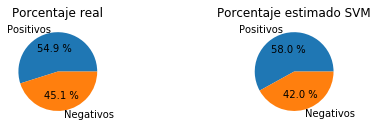

In [170]:
#Realizaremos gráfico de tortas SVM
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1,3,1)
plt.ion()  # Ponemos el modo interactivo
pol = [Reales.get_values()[0]*100,Reales.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje real')

plt.subplot(1,3,3)
plt.ion()  # Ponemos el modo interactivo
pol = [Estimados.get_values()[0]*100,Estimados.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje estimado SVM')


Text(0.7, 40, '71.0%')

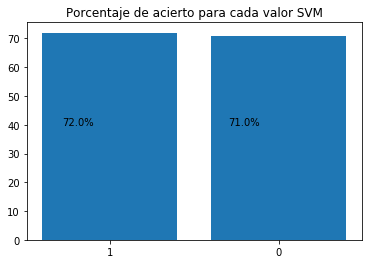

In [171]:
plt.ion()  # Ponemos el modo interactivo
pol = [precision_positive*100,precision_negative*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.bar(np.arange(2),pol)  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje de acierto para cada valor SVM')
plt.xticks(np.arange(2), [1,0])
plt.text(-0.28,40,str(precision_positive*100)+'%')
plt.text(0.7,40,str(precision_negative*100)+'%')

In [172]:
#kNN
Reales = tweets_corpus.polarity_bin.value_counts(normalize=True)
Estimados = X_test.polarity_kNN.value_counts(normalize=True)

from sklearn.metrics import classification_report
target_names = ['0', '1']
#hamming_loss(y_test, predicted_labels_knn)
a=classification_report(y_test, X_test.polarity_kNN, target_names=target_names)


from sklearn.metrics import accuracy_score
b=accuracy_score(y_test, X_test.polarity_kNN)

c=a.split()
precision_negative = float(c[5])
precision_positive = float(c[10])
precision_avg = float(c[15])


Text(0.5, 1.0, 'Porcentaje estimado kNN')

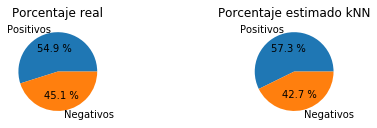

In [173]:
#Realizaremos gráfico de tortas kNN
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1,3,1)
plt.ion()  # Ponemos el modo interactivo
pol = [Reales.get_values()[0]*100,Reales.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje real')

plt.subplot(1,3,3)
plt.ion()  # Ponemos el modo interactivo
pol = [Estimados.get_values()[0]*100,Estimados.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje estimado kNN')

Text(0.7, 40, '76.0%')

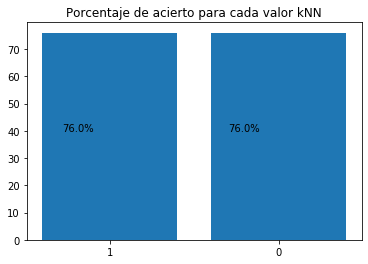

In [174]:
plt.ion()  # Ponemos el modo interactivo
pol = [precision_positive*100,precision_negative*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.bar(np.arange(2),pol)  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje de acierto para cada valor kNN')
plt.xticks(np.arange(2), [1,0])
plt.text(-0.28,40,str(precision_positive*100)+'%')
plt.text(0.7,40,str(precision_negative*100)+'%')

In [175]:
precision_avg

0.76